# Analysis

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [3]:
import pandas as pd
from src.constants import WANDB_DATA

In [34]:
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv(WANDB_DATA)
df_filtered = df[0:10]
df_filtered["name"]

0     cd_1.5
1     cd_1.7
2      cd2.1
3    iter_10
4     cd_2.0
5     cd_1.0
6     cd_1.2
7     cd_2.7
8    cd_norm
9     cd_1.4
Name: name, dtype: object

In [12]:
df_filtered[df_filtered["state"] == "finished"]

,config_animate,config_atm,config_atmos,config_coup,config_gcc,config_gfortran,config_name,config_notes,config_oc,config_ocean,...,end_ocean_run,end_trend_nino1+2,end_trend_nino3,end_trend_nino3.4,end_trend_nino4,end_trend_pac,name,state,tags,url
2,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0021, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd2.1,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,611.403570,0.545854,0.267445,0.289337,0.519428,0.559440,cd2.1,finished,[],https://wandb.ai/sdat2/seager19/runs/38x0f2kg
6,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0012, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.2,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1536.788786,0.560243,0.375186,0.375603,0.541339,0.568021,cd_1.2,finished,[],https://wandb.ai/sdat2/seager19/runs/3a4idlie
7,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0027, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_2.7,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1534.777277,0.561919,0.200153,0.221862,0.500907,0.554369,cd_2.7,finished,[],https://wandb.ai/sdat2/seager19/runs/1vre85tn
8,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.00225, 'rho_air': 1.225, 'iterations...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_norm,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1416.614244,0.548096,0.250295,0.273214,0.515109,0.558128,cd_norm,finished,[],https://wandb.ai/sdat2/seager19/runs/3ke8yisi
9,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0014, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.4,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1408.525637,0.552706,0.350710,0.357990,0.537039,0.566020,cd_1.4,finished,[],https://wandb.ai/sdat2/seager19/runs/2um7xc7h


In [23]:
eval(df_filtered[df_filtered["state"] == "finished"]["config_coup"][2])["c_d"]

0.0021

Text(0, 0.5, 'Trend over nino3.4 region [K]')

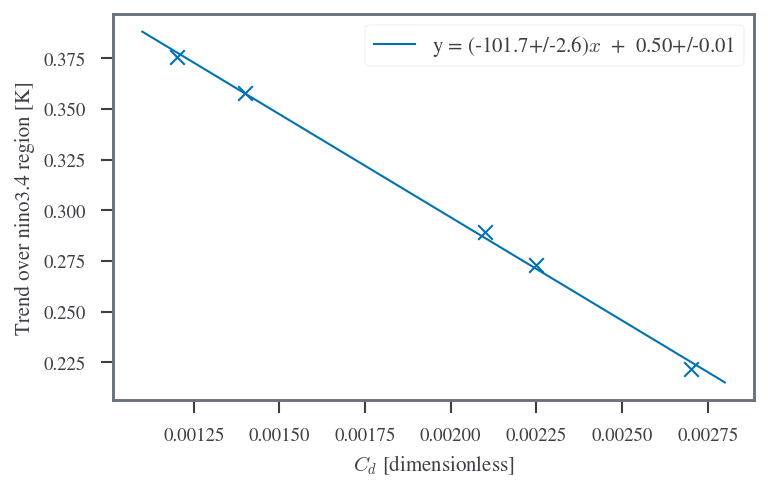

In [70]:
cd_list = list()

for coup_dict_str in df_filtered[df_filtered["state"] == "finished"]["config_coup"]:
    coup_dict = eval(coup_dict_str)
    cd_list.append(coup_dict['c_d'])

nino_34_list = df_filtered[df_filtered["state"] == "finished"]['end_trend_nino3.4'].tolist()

plt.scatter(cd_list, nino_34_list)

param, func = fit(cd_list, nino_34_list)
x_pred = np.linspace(min(cd_list)-1e-4, max(cd_list)+1e-4, num=50)
y_pred = func(x_pred)
plt.plot(x_pred, y_pred, label="y = ({:2.1f}".format(param[0]) + ")$x$  +  {:2.2f}".format(param[1]))
plt.legend()

plt.xlabel("$C_d$ [dimensionless]")
plt.ylabel(r"Trend over nino3.4 region [K]")

In [33]:
df_filtered[df_filtered["state"] == "finished"]['end_trend_nino3.4'].tolist()

[0.2893372901599713,
 0.3756030916768101,
 0.2218623636697925,
 0.2732137618555352,
 0.3579899903177476]

In [45]:
from src.models.linear import fit

In [46]:
param, func = fit(cd_list, nino_34_list)

In [47]:
param

array([-101.73939439678333+/-2.5842905236199925,
       0.4999583307204756+/-0.005189535953965309], dtype=object)

In [49]:
func(cd_list) - np.array(nino_34_list)

array([-0.00303169,  0.00226797,  0.0033996 , -0.00216907, -0.00046681])

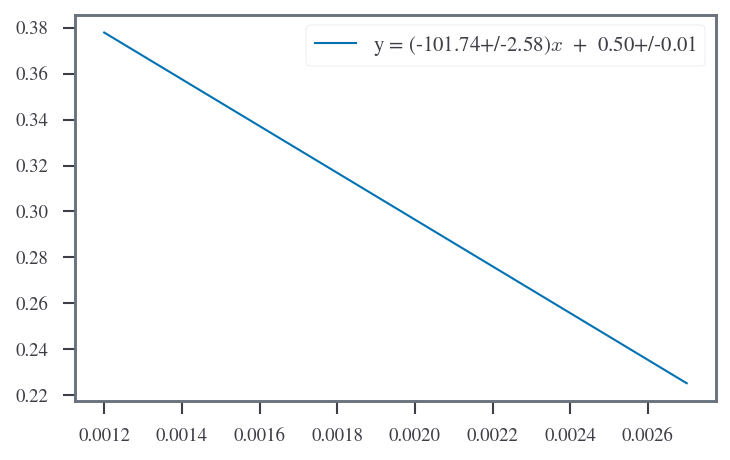

In [64]:
param, func = fit(cd_list, nino_34_list)
x_pred = np.linspace(min(cd_list), max(cd_list), num=50)
y_pred = func(x_pred)
plt.plot(x_pred, y_pred, label="y = ({:1.2f}".format(param[0]) + ")$x$  +  {:1.2}".format(param[1]))
plt.legend()